# LAB 2

In [1]:
import cv2  # pip install
import numpy as np  # pip install
import glob
import matplotlib.pyplot as plt # pip install
from scipy.spatial import distance as dist  # pip install

In [2]:
images = {}
index = {}
for path in glob.glob("./data/*.jpg"):
#     print(path)
    image = cv2.imread(path)
    filename = path.split("\\")[-1]
    images[filename] = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    hist = cv2.calcHist([image],[0,1,2],None,[8,8,8],[0,256,0,256,0,256])
    hist = cv2.normalize(hist,hist).flatten()
    index[filename] = hist
    print(filename)

hulk.jpg
ironman.jpg
magnetto.jpg
spiderman.jpg
venom.jpg
wolverine.jpg
wonderwoman.jpg
wonderwoman2.jpg


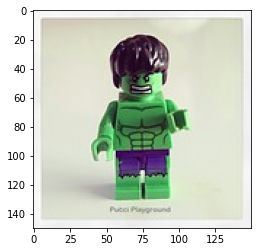

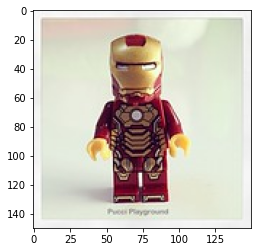

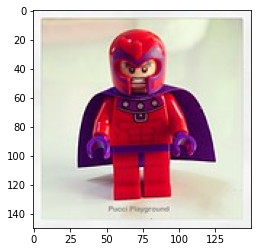

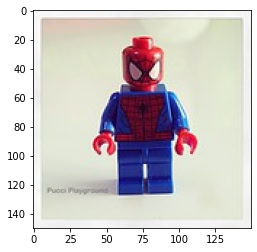

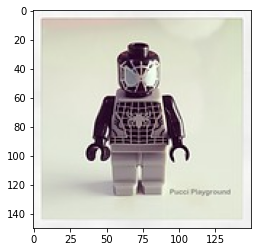

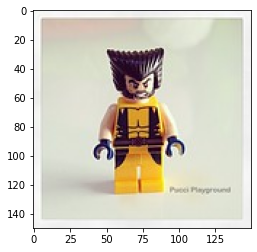

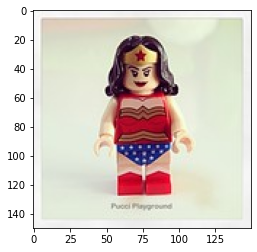

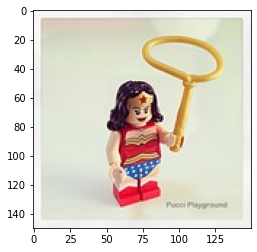

In [3]:
for k,v in images.items():
    plt.figure()
    plt.imshow(v)

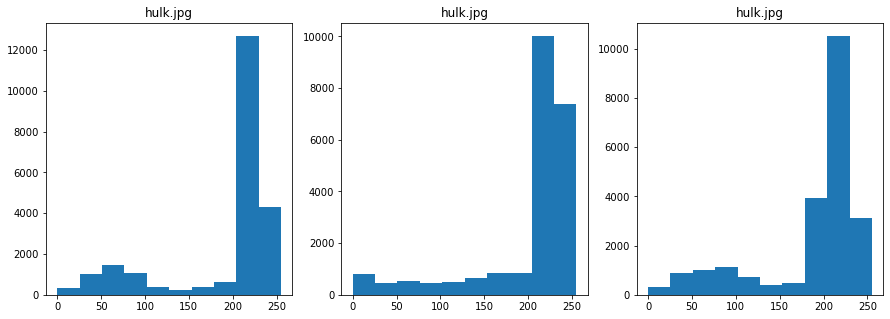

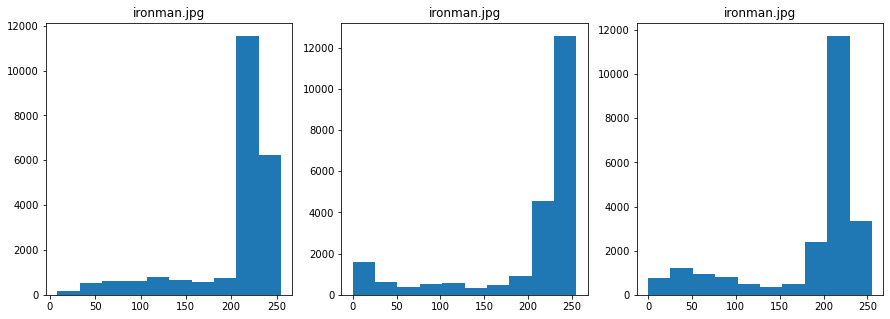

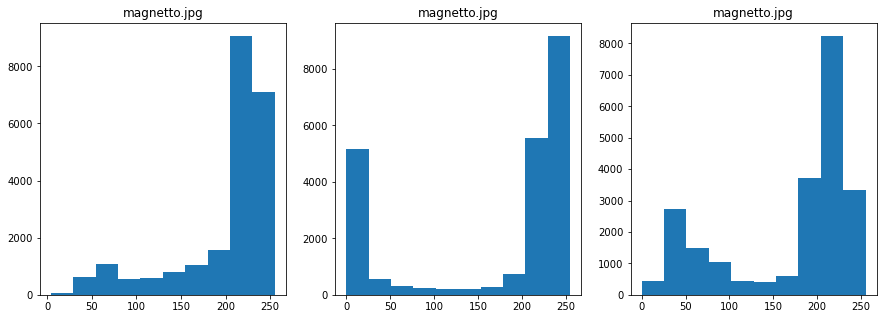

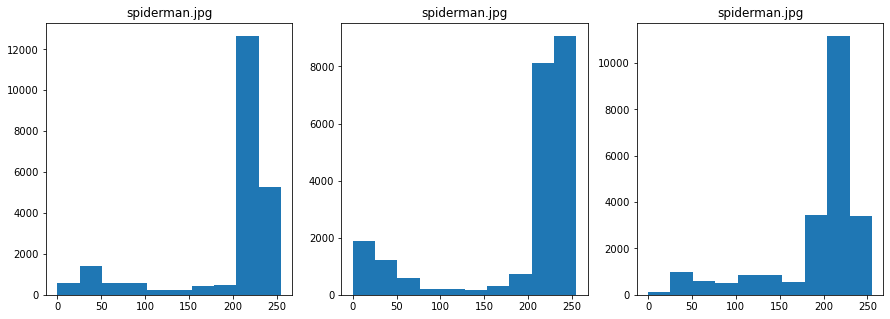

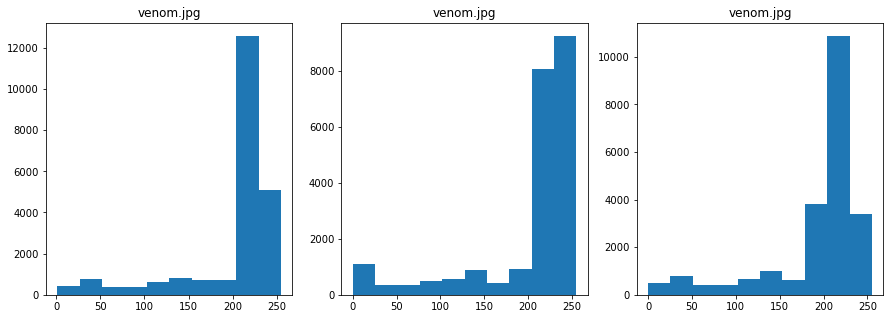

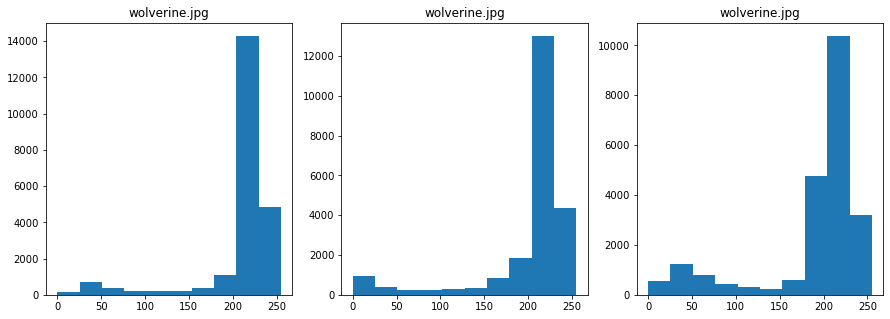

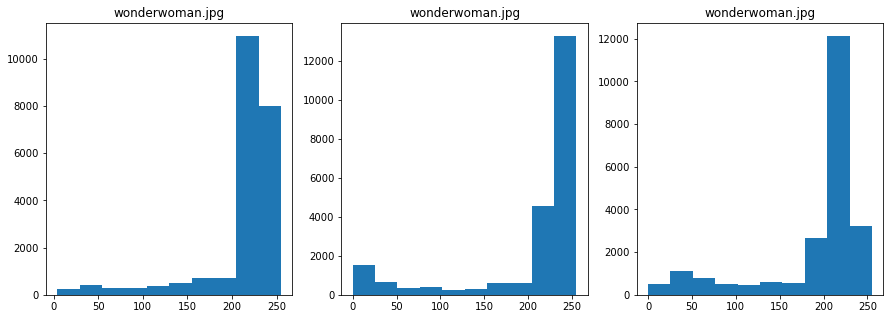

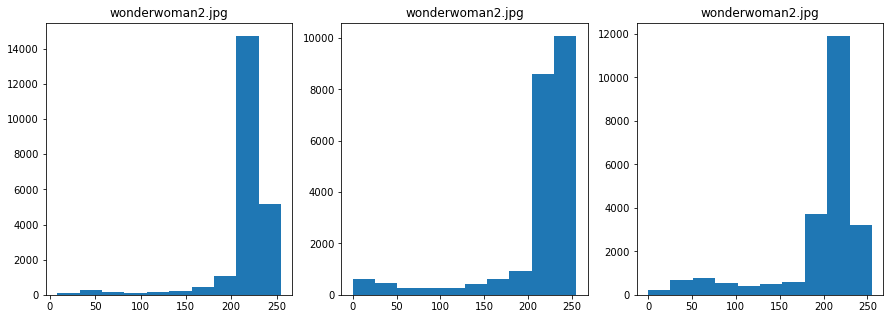

In [4]:
for k,v in images.items():
    plt.figure(figsize=(15,5))
    ax1 = plt.subplot(1,3,1)
    ax1.set_title(k)
    ax1.hist(v[:,:,0].flatten())
    ax2 = plt.subplot(1,3,2)
    ax2.set_title(k)
    ax2.hist(v[:,:,1].flatten())
    ax3 = plt.subplot(1,3,3)
    ax3.set_title(k)
    ax3.hist(v[:,:,2].flatten())    

Euc <function euclidean at 0x000002780012FBF8>
Taxi <function cityblock at 0x00000278001320D0>
Cheb <function chebyshev at 0x00000278001321E0>


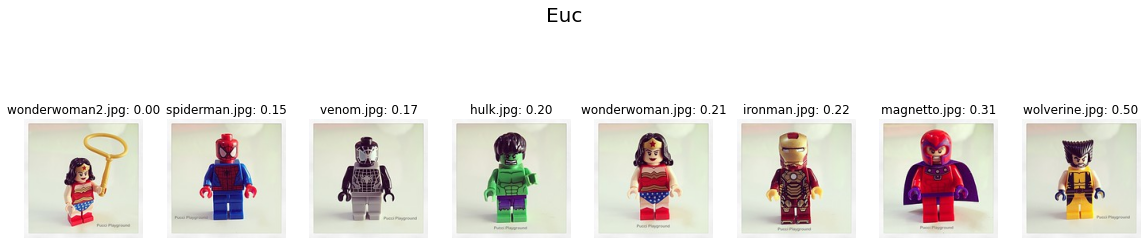

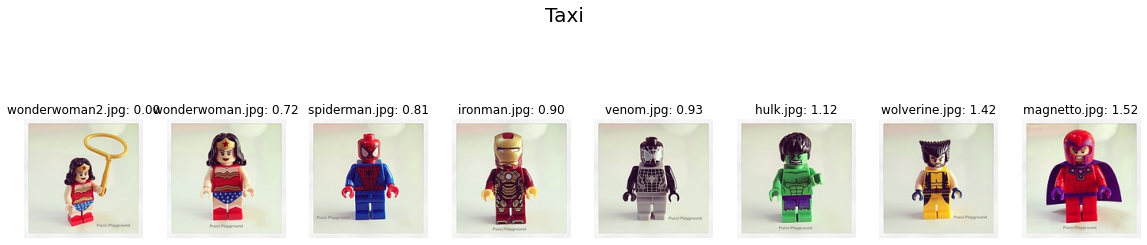

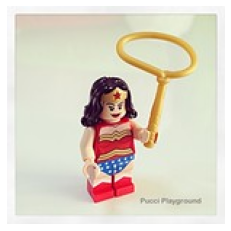

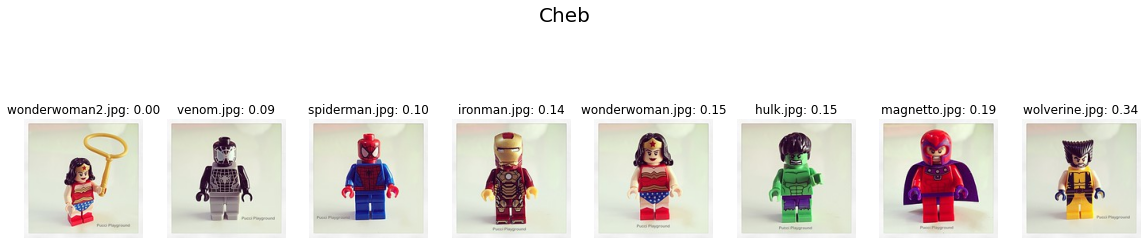

In [5]:
METRICS = (
    ("Euc",dist.euclidean),
    ("Taxi",dist.cityblock),
    ("Cheb",dist.chebyshev)
)

for name,method in METRICS:
    print(name,method)
    result = {}
    for k,hist in index.items():
        d = method(index["wonderwoman2.jpg"], hist)
        result[k] = d
    result = sorted([(v,k) for k,v in result.items()])
#     print(result)
    figure = plt.figure("Query")
    ax1 = figure.add_subplot(1,1,1)
    ax1.imshow(images["wonderwoman2.jpg"])
    plt.axis("off")
    fig = plt.figure("Results: %s" % (name), figsize=(20,5))
    fig.suptitle(name, fontsize = 20)
    for i,(v,k) in enumerate(result):
        ax = fig.add_subplot(1, len(images),i+1)
        ax.set_title("%s: %.2f" % (k,v))
        plt.imshow(images[k])
        plt.axis("off")
        

# HOMEWORK

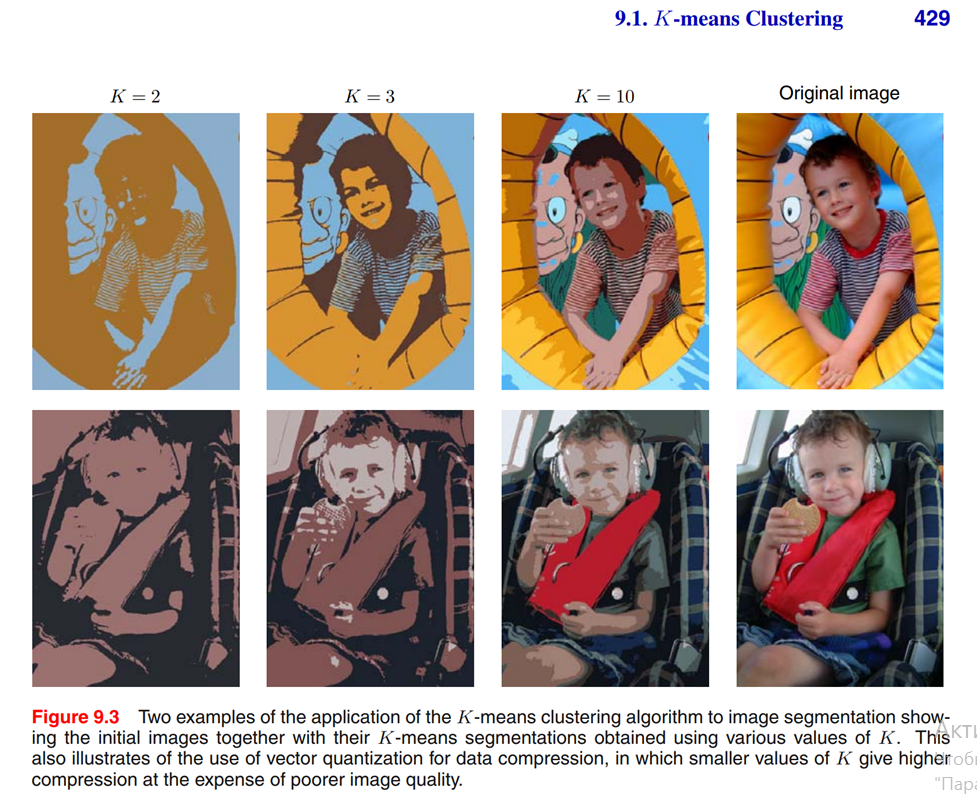

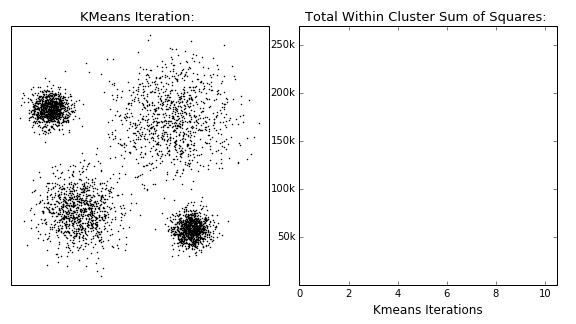

## Introduction to K-Means Clustering
* Step 1: Choose the number of clusters k. ...
* Step 2: Select k random points from the data as centroids. ...
* Step 3: Assign all the points to the closest cluster centroid. ...
* Step 4: Recompute the centroids of newly formed clusters. ...
* Step 5: Repeat steps 3 and 4.

### Task
* Read 9.1 - KMeans of Bishop book

* Develop the code of the K-means clustering algorithm for Image Segmentation. In Fig.9.3 you can see an example of the final processing result. You should use only the NumPy library. Test your implementation against k = [2,3,10]. Visualize your result. Write a conclusion about the complexity of your implementation and the quality of image compression. Don't use copy-past from the internet, cause it deserves zero marks.


In [6]:
class KMeans():
    def __init__(self, k, n_iteration):
        self.k = k # Amount of classes
        self.n_iteration = n_iteration
        
        #Put your code here for
        # 1.centroid init
        # 2.iterations through data points and evaluation of centroids' positions

    def fit(self, data):
        self.data = data
        self.centroid_init = self.centroid_init()
        self.points_centroids = np.zeros(len(data))

        for _ in range(self.n_iteration):
            for i in range(len(self.data)):
                point = data[i]
                closest_cluster_centroid = self.get_closest_cluster_centroid(point)
                self.points_centroids[i] = closest_cluster_centroid

            for p in range(len(self.centroid_init)):
                self.centroid_init[p] = self.data[self.points_centroids == p].mean(axis=0)

    def get_closest_cluster_centroid(self, point):
        distances = self.get_distance(point)
        return np.argmin(distances)

    def get_distance(self, point):
        return np.sqrt(((point - self.centroid_init)**2).sum(axis=1))

    def centroid_init(self):
        centroids = self.data.copy()
        np.random.shuffle(centroids)
        return centroids[:self.k]

    def classify(self,x):
        return self.centroid_init[self.get_closest_cluster_centroid(x)]

In [7]:
# Input data
data = [images["hulk.jpg"].reshape((-1,3)) for k in images.keys()]

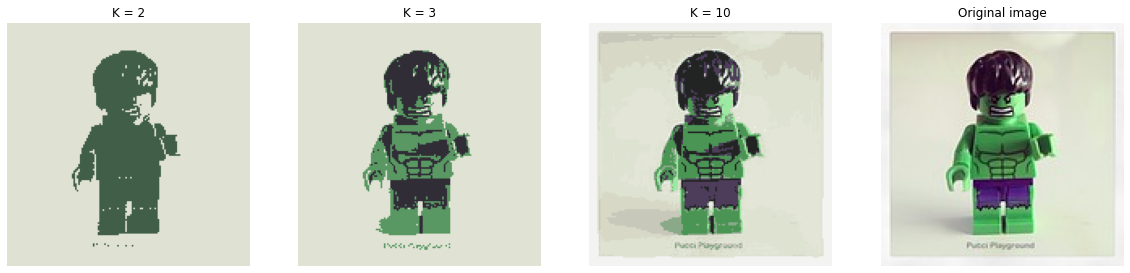

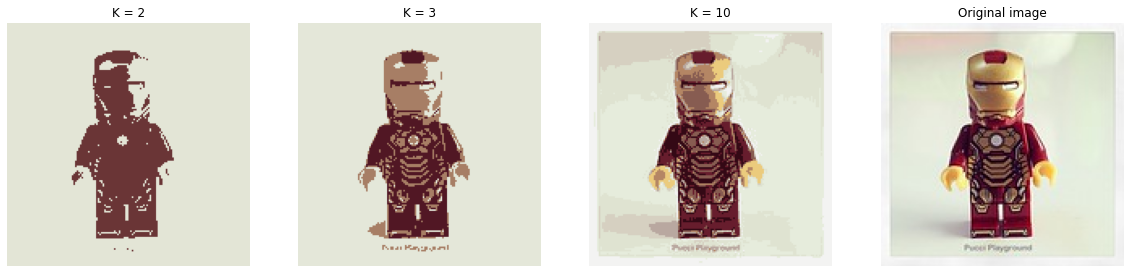

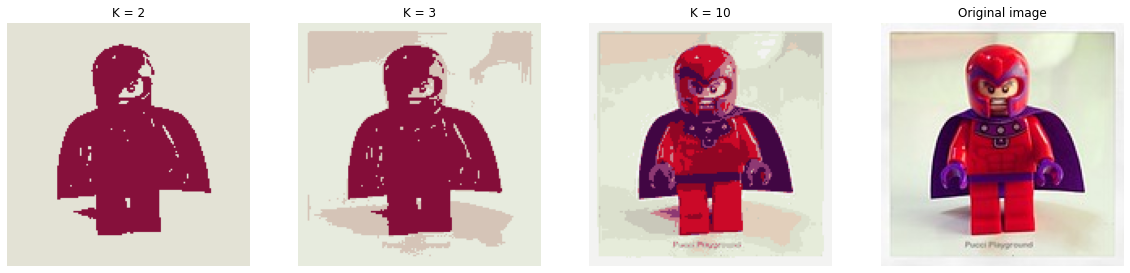

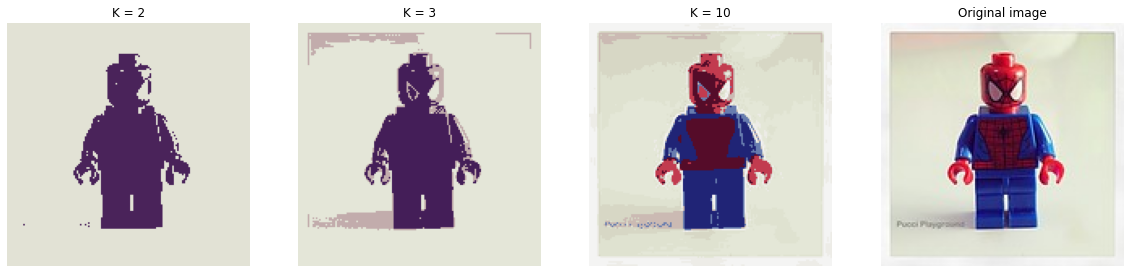

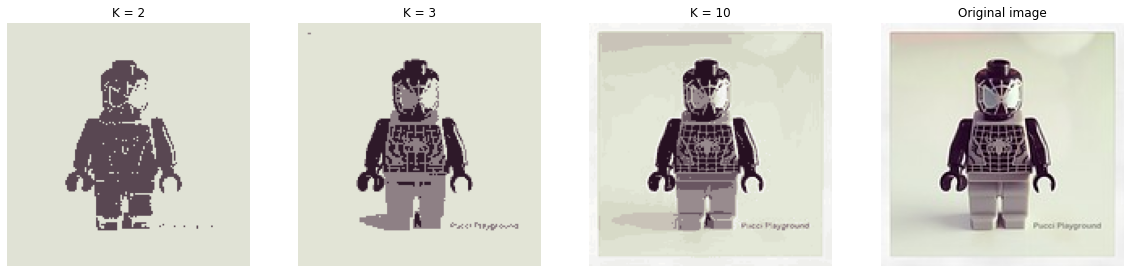

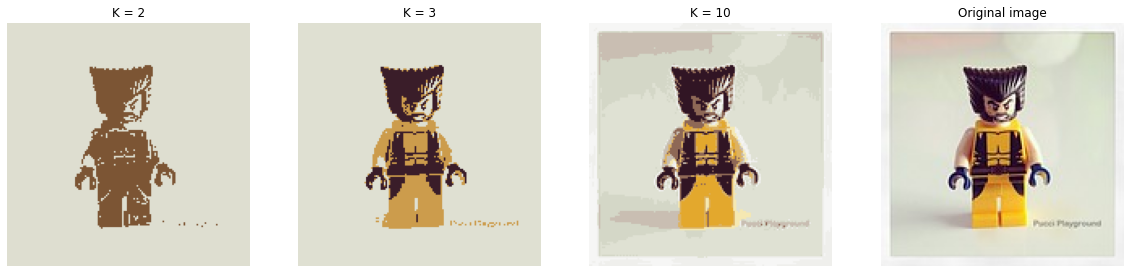

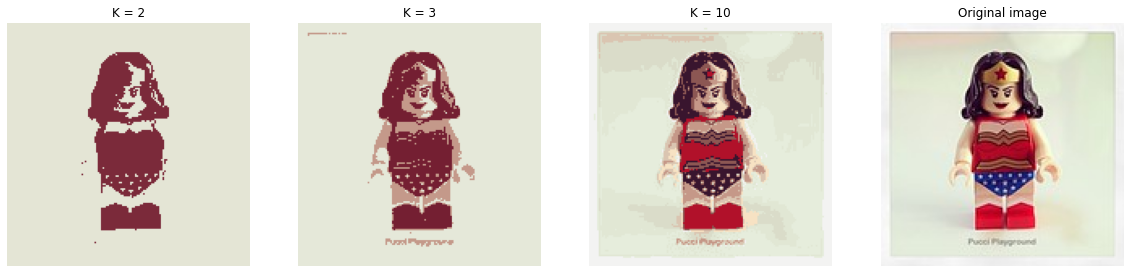

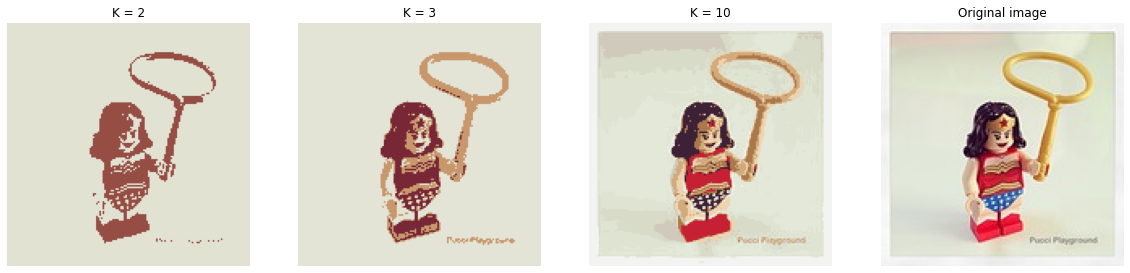

In [8]:
# Put your code here

K = [2, 3, 10]
for k, v in images.items():
    raw_image = images[k]
    img = raw_image.reshape((-1,3))
    segmented = []

    for c in K:
        kmeans = KMeans(c, 20)
        kmeans.fit(np.float64(img))

        result = np.array([kmeans.classify(point) for point in img])

        result = np.uint8(result)
        result_image = result.reshape(raw_image.shape)
        segmented.append(result_image)

    plt.figure(figsize=(20, 20))
    for resImgindex in range(1, len(segmented) + 1):
        plt.subplot(1, len(K) + 1, resImgindex)
        plt.imshow(segmented[resImgindex - 1])
        plt.title('K = %i' % K[resImgindex - 1])
        plt.axis("off")

    plt.subplot(1,len(K) + 1, len(K) + 1)
    plt.imshow(raw_image)
    plt.title('Original image')
    plt.axis("off")
    plt.show()